Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check GPU availability

In [12]:
!nvidia-smi
#!pwd
#%cd /content/drive/MyDrive/MaskGIT/
#!unzip archive.zip # should only execute once
#!rm archive.zip

Mon Mar 28 18:56:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Load images

/content
Total number of images:
509
Resolution of image:
(3648, 2736, 3)


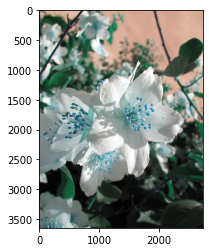

In [4]:
%cd /content/
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

PATH_TO_DATA_DIR = 'drive/MyDrive/MaskGIT/flowers/white_flowers'

all_images = glob.glob(PATH_TO_DATA_DIR + '/*.png')
print("Total number of images:")
print(len(all_images))

# load one images
img = cv2.imread(all_images[25])
#img = np.array(img).astype(np.float64)
print("Resolution of image:")
print(img.shape)
plt.imshow(img)

Clone our project repo and check version of repo

In [4]:
%cd /content/
!rm -rf DL_Project
!git clone https://github.com/ericXin95616/DL_Project.git
%cd DL_Project
!git log --name-status HEAD^..HEAD

/content
Cloning into 'DL_Project'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 67 (delta 25), reused 57 (delta 18), pack-reused 0
Unpacking objects: 100% (67/67), done.
/content/DL_Project
commit fde2eca1c065385afbb228acbad5825fe2b1702b (HEAD -> main, origin/main, origin/HEAD)
Author: ericXin95616 <xinbochao97@outlook.com>
Date:   Mon Mar 28 22:21:09 2022 -0400

    Add script to calculate inception-score; We probably need to fine-tune that inception model

A	inception-score-pytorch/LICENSE.md
A	inception-score-pytorch/README.md
A	inception-score-pytorch/inception_score.py


Try to train our VQGAN

In [18]:
%cd /content/
!python DL_Project/MaskGIT-pytorch/training_vqgan.py --dataset-path='drive/MyDrive/MaskGIT/flowers/white_flowers' --batch-size=4 --result-dir='drive/MyDrive/MaskGIT/results/vqgan_results' --ckpt-dir='drive/MyDrive/MaskGIT/checkpoints/vqgan_ckpt'

/content
Traceback (most recent call last):
  File "DL_Project/MaskGIT-pytorch/training_vqgan.py", line 5, in <module>
    import torch
  File "/usr/local/lib/python3.7/dist-packages/torch/__init__.py", line 721, in <module>
    import torch.utils.data
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/__init__.py", line 38, in <module>
    from torch.utils.data.dataloader_experimental import DataLoader2
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader_experimental.py", line 11, in <module>
    from torch.utils.data.datapipes.iter import IterableWrapper
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/datapipes/__init__.py", line 1, in <module>
    from . import iter
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/datapipes/iter/__init__.py", line 1, in <module>
    from torch.utils.data.datapipes.iter.callable import (
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/datapipes/iter/callable.py", line 

Try to train bidirectional transformer

In [31]:
%cd /content/
!python DL_Project/MaskGIT-pytorch/training_transformer.py --dataset-path='drive/MyDrive/MaskGIT/flowers/white_flowers' --batch-size=4 --result-dir='drive/MyDrive/MaskGIT/results/transformer_results' --ckpt-dir='drive/MyDrive/MaskGIT/checkpoints/transformer_ckpt' --checkpoint-path='drive/MyDrive/MaskGIT/checkpoints/vqgan_ckpt/vqgan_epoch_49.pt'

/content
Loaded Checkpoint for VQGAN....
100% 129/129 [02:21<00:00,  1.09s/it, Transformer_Loss=1.48]
Number of non_zero elements in masked: 0. Expected: 0
Number of non_zero elements in masked: 128. Expected: 3
Number of non_zero elements in masked: 128. Expected: 12
Number of non_zero elements in masked: 128. Expected: 27
Number of non_zero elements in masked: 128. Expected: 48
Number of non_zero elements in masked: 128. Expected: 74
Number of non_zero elements in masked: 128. Expected: 105
Number of non_zero elements in masked: 139. Expected: 139
Number of non_zero elements in masked: 176. Expected: 176
Number of non_zero elements in masked: 215. Expected: 215
Number of non_zero elements in masked: 256. Expected: 256
Number of non_zero elements in masked: 0. Expected: 0
Number of non_zero elements in masked: 3. Expected: 3
Number of non_zero elements in masked: 12. Expected: 12
Number of non_zero elements in masked: 27. Expected: 27
Number of non_zero elements in masked: 48. Expecte

Use the trained MaskGIT to generate images

In [ ]:
# CODE goes here

Install Pytorch-fid

In [1]:
%cd /content/
!pip install pytorch-fid

/content
  Created wheel for pytorch-fid: filename=pytorch_fid-0.2.1-py3-none-any.whl size=14835 sha256=695d2fb826fde0dae8af48eac8c71a381c1fd150bcb6e8300ee6fe91733bc7d7
  Stored in directory: /root/.cache/pip/wheels/24/ac/03/c5634775c8a64f702343ef5923278f8d3bb8c651debc4a6890
Successfully built pytorch-fid


Compute FID of the generate image

In [3]:
%cd /content/
!python -m pytorch_fid --bat-size=8 --num-workers=1 --device='cuda:0' drive/MyDrive/MaskGIT/flowers drive/MyDrive/MaskGIT/results/transformer_results

/content
usage: __main__.py [-h] [--batch-size BATCH_SIZE] [--num-workers NUM_WORKERS]
                   [--device DEVICE] [--dims {64,192,768,2048}]
                   path path
__main__.py: error: the following arguments are required: path


Compute IS of the generate image

In [ ]:
%cd /content/DL_Project/inception-score-pytorch/
!python inception_score.py